          growth    tannin
count   9.000000  9.000000
mean    6.888889  4.000000
std     3.689324  2.738613
min     2.000000  0.000000
25%     3.000000  2.000000
50%     7.000000  4.000000
75%    10.000000  6.000000
max    12.000000  8.000000
[0 1 2 3 4 5 6 7 8]


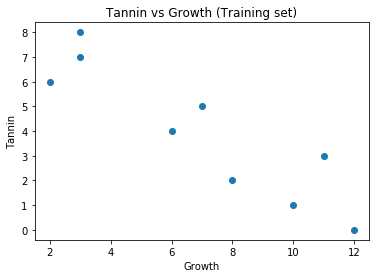

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

os.chdir("D:\\Dropbox\\Fund Prog e Estatistica\\db")
arquivo = pd.read_csv("tannin.csv")

print(arquivo.describe())

arquivo_np = np.array(arquivo)
print(arquivo_np[:,1])
plt.plot(arquivo_np[:,0],arquivo_np[:,1],'o')
plt.title('Tannin vs Growth (Training set)')
plt.xlabel('Growth')
plt.ylabel('Tannin')
plt.show()


In [2]:
from scipy.stats import norm
from scipy import stats

x1 = norm.rvs(loc=10000, scale=1000, size=50)
x2 = norm.rvs(loc=1000, scale=100, size=50)
x3 = norm.rvs(loc=1000, scale=100, size=50)

print(x1.mean())
print(x2.mean())
print(x3.mean())

stats.ttest_1samp(x1 ,10000)


9938.25415921
1022.58364053
1037.17221579


Ttest_1sampResult(statistic=-0.40928791434285766, pvalue=0.68411200328084876)

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

X = pd.DataFrame(arquivo["tannin"])
y = pd.DataFrame(arquivo["growth"])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     30.97
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           0.000846
Time:                        08:16:02   Log-Likelihood:                -16.380
No. Observations:                   9   AIC:                             36.76
Df Residuals:                       7   BIC:                             37.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         11.7556      1.041     11.295      0.000         9.294    14.217
tannin        -1.2167      0.219     -5.565      0.001        -1.734    -0.700
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   2.937
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.227
Skew:                           0.319   Prob(JB):                        0.893
Kurtosis:                       2.554   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
import pandas as pd
import statsmodels.api as sm
import os

os.chdir("D:\Dropbox\Fund Prog e Estatistica\db")
dados = pd.read_csv("HBAT.csv")

#print(dados["x11"])
# Variável independente
X = ["x" + str(i) for i in range(9,19)]
print(X)

# Variável dependente
y = pd.DataFrame(dados["x19"])

for independente in X:
    x = pd.DataFrame(dados[independente])
    
    x = sm.add_constant(x)

    # OLS - Ordinary Least Squares
    model = sm.OLS(y, x).fit()

    # Exibindo as previsões para o conjunto passado
    # model.predict(x)

    # Exibindo as estatísticas do modelo
    print(model.summary())


['x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
                            OLS Regression Results                            
Dep. Variable:                    x19   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     56.07
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           3.09e-11
Time:                        08:16:03   Log-Likelihood:                -136.32
No. Observations:                 100   AIC:                             276.6
Df Residuals:                      98   BIC:                             281.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

In [5]:
dados2 = dados[X]
np.corrcoef(dados2)

array([[ 1.        ,  0.10357736,  0.02252281, ...,  0.24295319,
         0.76795229,  0.6305851 ],
       [ 0.10357736,  1.        ,  0.52347618, ...,  0.56938752,
        -0.05131223, -0.01562722],
       [ 0.02252281,  0.52347618,  1.        , ...,  0.4783479 ,
         0.0548081 , -0.31009963],
       ..., 
       [ 0.24295319,  0.56938752,  0.4783479 , ...,  1.        ,
         0.49282144,  0.4778548 ],
       [ 0.76795229, -0.05131223,  0.0548081 , ...,  0.49282144,
         1.        ,  0.78753829],
       [ 0.6305851 , -0.01562722, -0.31009963, ...,  0.4778548 ,
         0.78753829,  1.        ]])